# Ahmed Samy Ahmed

# K Nearest Neighbour tutorial 
<hr>



## * What we will discuss in this Notebook
#### 1- The idea of the algorithm .
#### 2- How to implement this algorithm in a simple and obvious way.
#### 3- How to perform the ML pipeline method in a clear steps.
#### 4- conclusion of what did i do to control the overfitting in my model

# The idea of the algorithm 
   The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
   

![alt text](Capture2.png "Title")


# How to implement this algorithm in a simple and obvious way
   The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
    The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points.
    

![alt text](Capture3.png "Title" )


# importing the libraries & Dataset :

## Context
This dataset was created as part of the Multimodal System project for a robotic assistant through reinforcement learning, where it was necessary to recognize when a student had a question.

## Content
The first 16 columns of the dataset correspond to the key points of the reconstruction of the human pose, obtained through the OpenPose network (https://github.com/CMU-Perceptual-Computing-Lab/openpose)
, this information is normalized with respect to the size of the captured image. In the last column are the labels, which can be three:

Stop
Question
None

## Inspiration
This dataset was designed to allow models to classify poses based on information obtained from networks capable of reconstructing poses such as OpenPose. In order to carry out educational-oriented applications

In [1]:
# Importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  collections import Counter
import seaborn as sns

df = pd.read_csv('Dataset.csv')
df.head(10)

,0.478125,0.4125,0.434375,0.45625,0.45625.1,0.390625,0.390625.1,0,0.716666666666667,0.804166666666667,0.845833333333333,0.889583333333333,0.86875,0.78125,0.86875.1,0.1,2
0,0.478125,0.412500,0.434375,0.456250,0.456250,0.390625,0.390625,0.434375,0.716667,0.804167,0.845833,0.889583,0.868750,0.781250,0.868750,0.825000,2
1,0.478125,0.412500,0.434375,0.456250,0.456250,0.390625,0.390625,0.434375,0.716667,0.804167,0.845833,0.889583,0.868750,0.781250,0.868750,0.825000,2
2,0.478125,0.412500,0.390625,0.456250,0.456250,0.390625,0.390625,0.000000,0.716667,0.804167,0.781250,0.889583,0.868750,0.781250,0.868750,0.000000,2
3,0.478125,0.412500,0.390625,0.456250,0.456250,0.390625,0.390625,0.000000,0.737500,0.804167,0.781250,0.889583,0.868750,0.781250,0.868750,0.000000,2
4,0.390625,0.390625,0.325000,0.303125,0.303125,0.434375,0.412500,0.412500,0.672917,0.781250,0.804167,0.868750,0.956250,0.804167,0.868750,0.912500,1
5,0.390625,0.368750,0.325000,0.303125,0.303125,0.434375,0.412500,0.412500,0.693750,0.781250,0.804167,0.868750,0.956250,0.804167,0.889583,0.933333,1
6,0.390625,0.368750,0.325000,0.303125,0.303125,0.434375,0.412500,0.412500,0.693750,0.781250,0.804167,0.868750,0.956250,0.804167,0.889583,0.956250,1
7,0.412500,0.390625,0.346875,0.303125,0.346875,0.434375,0.456250,0.456250,0.672917,0.781250,0.804167,0.912500,0.956250,0.804167,0.889583,0.912500,2
8,0.412500,0.390625,0.346875,0.325000,0.346875,0.434375,0.456250,0.456250,0.672917,0.781250,0.804167,0.912500,0.933333,0.804167,0.889583,0.933333,1
9,0.412500,0.390625,0.346875,0.325000,0.346875,0.434375,0.456250,0.456250,0.672917,0.781250,0.804167,0.912500,0.933333,0.804167,0.889583,0.956250,1


# The above dataset express a pictures like this..
*Depending on these numbers ,we can recognize the pose of a person( Running ,standing , setting ,etc... )*
![alt text](Capture.png "Title" )


In [2]:
df.shape

(1086, 17)

In [3]:
# Replace spaces in the column names with underscore
df = df.rename({'2': 'Result_pose'}, axis=1)  # new method


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0.478125           1086 non-null   float64
 1   0.4125             1086 non-null   float64
 2   0.434375           1086 non-null   float64
 3   0.45625            1086 non-null   float64
 4   0.45625.1          1086 non-null   float64
 5   0.390625           1086 non-null   float64
 6   0.390625.1         1086 non-null   float64
 7   0                  1086 non-null   float64
 8   0.716666666666667  1086 non-null   float64
 9   0.804166666666667  1086 non-null   float64
 10  0.845833333333333  1086 non-null   float64
 11  0.889583333333333  1086 non-null   float64
 12  0.86875            1086 non-null   float64
 13  0.78125            1086 non-null   float64
 14  0.86875.1          1086 non-null   float64
 15  0.1                1086 non-null   float64
 16  Result_pose        1086 

# Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them

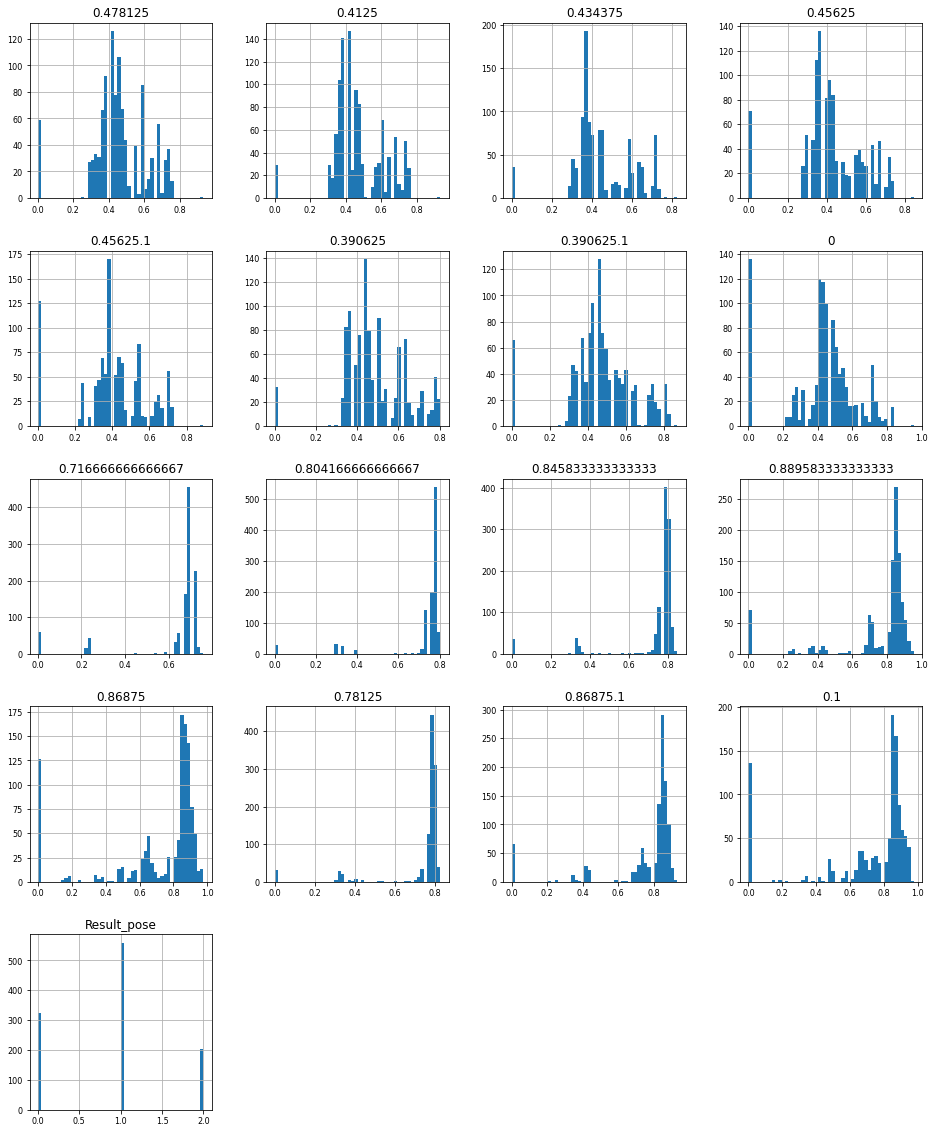

In [5]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

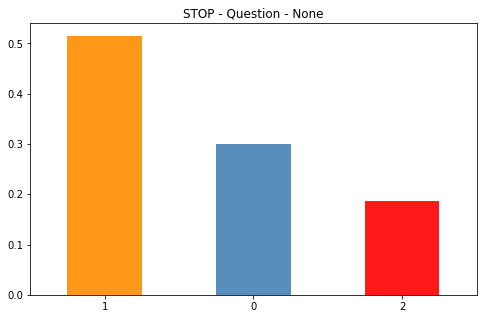

In [6]:
# Checking the nature of data set: balanced or imbalanced?
fig = plt.figure(figsize = (8,5))
df.Result_pose.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue','red'], alpha = 0.9, rot=0)
plt.title('STOP - Question - None')
plt.show()

The above Histogram shows a distribution of around 50% : 30% : 20% between STOP - Question - None poses respectively. So the data is quite balanced and it does not require any special treatment/resampling.

# Handling of Missing Data

In [7]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Result_pose,0,0.0
0,0,0.0
0.4125,0,0.0
0.434375,0,0.0
0.45625,0,0.0


In [8]:
# Check the list of categorical variables
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [9]:
df.columns

Index(['0.478125', '0.4125', '0.434375', '0.45625', '0.45625.1', '0.390625',
       '0.390625.1', '0', '0.716666666666667', '0.804166666666667',
       '0.845833333333333', '0.889583333333333', '0.86875', '0.78125',
       '0.86875.1', '0.1', 'Result_pose'],
      dtype='object')

# Outliers Detection and Removal

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.478125             0.195312
0.4125               0.195312
0.434375             0.217187
0.45625              0.195313
0.45625.1            0.195312
0.390625             0.217187
0.390625.1           0.173438
0                    0.129687
0.716666666666667    0.020833
0.804166666666667    0.043750
0.845833333333333    0.043750
0.889583333333333    0.131250
0.86875              0.237500
0.78125              0.043750
0.86875.1            0.108333
0.1                  0.195833
Result_pose          1.000000
dtype: float64


In [11]:
# Removing outliers from dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(696, 17)

# Correlation among Features
Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

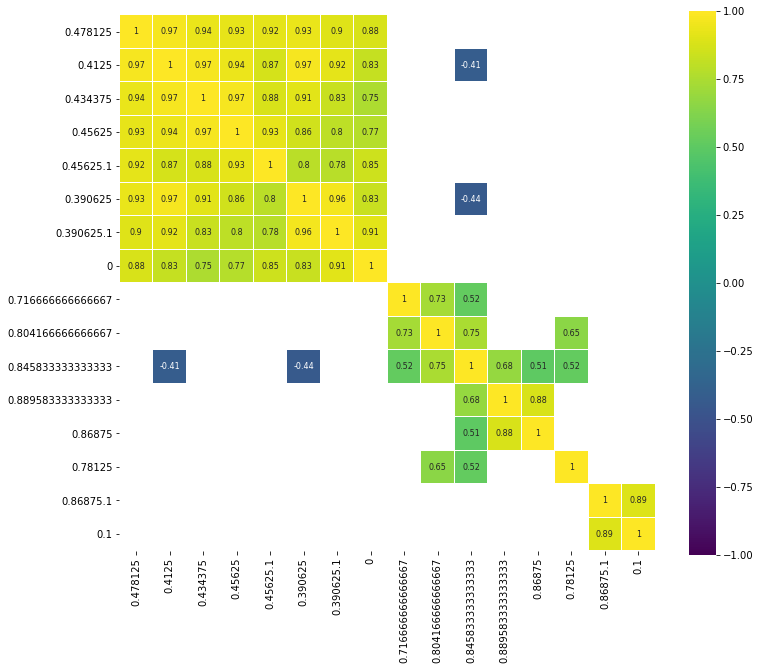

In [12]:
corr = df.drop('Result_pose', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Top 10 Feature Selection through Chi-Square

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='Result_pose']
y = df[['Result_pose']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['0.434375', '0.45625', '0.45625.1', '0.390625', '0.390625.1', '0',
       '0.889583333333333', '0.86875', '0.86875.1', '0.1'],
      dtype='object')


These are top 10 features impacting on Human pose. We will check feature importance with other methods as well.
# Feature Importance using Wrapper Method

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df.drop('Result_pose', axis=1)
y = df['Result_pose']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['0.889583333333333', '0.86875', '0.86875.1', '0.1']
[0.01914883 0.02152261 0.0278667  0.02674261 0.02890094 0.02772598
 0.03568939 0.03896945 0.00871142 0.01108119 0.02126167 0.10662688
 0.22327256 0.02288725 0.12420459 0.25538792]


In [15]:
df.columns

Index(['0.478125', '0.4125', '0.434375', '0.45625', '0.45625.1', '0.390625',
       '0.390625.1', '0', '0.716666666666667', '0.804166666666667',
       '0.845833333333333', '0.889583333333333', '0.86875', '0.78125',
       '0.86875.1', '0.1', 'Result_pose'],
      dtype='object')

In [16]:
Best_features=['0.434375', '0.45625', '0.45625.1', '0.390625', '0.390625.1', '0',
       '0.889583333333333', '0.86875', '0.86875.1', '0.1']

In [17]:
#x= df[Best_features]
x=df.drop(['Result_pose'],axis=1)
y=df['Result_pose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.3)

# 1- Model using sklearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report

for i in [1,3,4,5,7,9,11,13,15]:
    neigh = KNeighborsClassifier(n_neighbors=i)

    neigh.fit(X_train , y_train)
    test_preds = (neigh.predict(X_test))
    train_preds = (neigh.predict(X_train))

    print("acc_train= " ,  accuracy_score(y_train, train_preds))
    print("acc_test= " ,  accuracy_score(y_test, test_preds))
    print('\n')
    #print("Report= " ,  classification_report(y_test, test_preds))


acc_train=  1.0
acc_test=  0.9569377990430622


acc_train=  0.9568788501026694
acc_test=  0.9330143540669856


acc_train=  0.9527720739219713
acc_test=  0.9282296650717703


acc_train=  0.9404517453798767
acc_test=  0.9234449760765551


acc_train=  0.9219712525667351
acc_test=  0.9043062200956937


acc_train=  0.9137577002053389
acc_test=  0.8708133971291866


acc_train=  0.8993839835728953
acc_test=  0.8564593301435407


acc_train=  0.8973305954825462
acc_test=  0.8564593301435407


acc_train=  0.8850102669404517
acc_test=  0.861244019138756




# Cross validation

In [19]:
x= df[Best_features]
#x= (df.drop(['Result_pose'],axis=1))
y= (df['Result_pose'])

from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.83571429 0.76258993 0.81294964 0.8057554  0.87769784]
cv_scores mean:0.8189414182939363


# Grid search

In [20]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)

{'n_neighbors': 4}
0.8189414182939363


# 2- Model of my own implementation

In [21]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = [self._predict(x) for x in X_test] 
        return np.array(y_pred)

    def _predict(self, X_test):
        # Compute distances between X_test and all examples in the training set
        distances = [self.euclidean_distance(X_test, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)[0][0]
        return most_common
    
    def euclidean_distance(self,x_test, x_train):
        # Compute Euclidean distances between X_test and all examples in the training set
        return np.sqrt(np.sum((x_test - x_train) ** 2))

    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

#### Using all given Features 

In [22]:
#x= df[Best_features]    
x=df.drop(['Result_pose'],axis=1)
y=df['Result_pose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

knn2 = KNN(k=4)
knn2.fit(X_train, y_train)
train_preds = knn2.predict(X_train)
test_preds = knn2.predict(X_test)

print("Train classification accuracy", knn2.accuracy(y_train, train_preds))
print("Test classification accuracy", knn2.accuracy(y_test, test_preds))

Train classification accuracy 0.9694244604316546
Test classification accuracy 0.95


#### Using only extracted Features 

In [23]:
x= df[Best_features]    
#x=df.drop(['Result_pose'],axis=1)
y=df['Result_pose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

knn2 = KNN(k=4)
knn2.fit(X_train, y_train)
train_preds = knn2.predict(X_train)
test_preds = knn2.predict(X_test)

print("Train classification accuracy", knn2.accuracy(y_train, train_preds))
print("Test classification accuracy", knn2.accuracy(y_test, test_preds))
print("Best Fitting")

Train classification accuracy 0.9676258992805755
Test classification accuracy 0.9642857142857143
Best Fitting


In [24]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, test_preds)
print(confusion)
print("Report= " ,  classification_report(y_test, test_preds))

[[45  1  0]
 [ 0 61  1]
 [ 0  3 29]]
Report=                precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.94      0.98      0.96        62
           2       0.97      0.91      0.94        32

    accuracy                           0.96       140
   macro avg       0.97      0.96      0.96       140
weighted avg       0.97      0.96      0.96       140



#### Same as the above cell ,But with different ratio of train test Spliting...

## When increase the testing data to be 30% of the Whole Dataset

In [25]:
x= df[Best_features]    
#x=df.drop(['Result_pose'],axis=1)
y=df['Result_pose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.3)

knn2 = KNN(k=4)
knn2.fit(X_train, y_train)
train_preds = knn2.predict(X_train)
test_preds = knn2.predict(X_test)

print("Train classification accuracy", knn2.accuracy(y_train, train_preds))
print("Test classification accuracy", knn2.accuracy(y_test, test_preds))
print('# overfitting increased')

Train classification accuracy 0.9630390143737166
Test classification accuracy 0.9330143540669856
# overfitting increased


In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, test_preds)
print(confusion)
print("Report= " ,  classification_report(y_test, test_preds))

[[64  3  0]
 [ 0 85  1]
 [ 0 10 46]]
Report=                precision    recall  f1-score   support

           0       1.00      0.96      0.98        67
           1       0.87      0.99      0.92        86
           2       0.98      0.82      0.89        56

    accuracy                           0.93       209
   macro avg       0.95      0.92      0.93       209
weighted avg       0.94      0.93      0.93       209



## When decrease the testing data to be 10% of the Whole Dataset

In [27]:
x= df[Best_features]    
#x=df.drop(['Result_pose'],axis=1)
y=df['Result_pose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.1)

knn2 = KNN(k=4)
knn2.fit(X_train, y_train)
train_preds = knn2.predict(X_train)
test_preds = knn2.predict(X_test)

print("Train classification accuracy", knn2.accuracy(y_train, train_preds))
print("Test classification accuracy", knn2.accuracy(y_test, test_preds))
print('# Underfitting')

Train classification accuracy 0.9696485623003195
Test classification accuracy 0.9714285714285714
# Underfitting


In [28]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, test_preds)
print(confusion)
print("Report= " ,  classification_report(y_test, test_preds))


[[25  0  0]
 [ 0 31  0]
 [ 0  2 12]]
Report=                precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.94      1.00      0.97        31
           2       1.00      0.86      0.92        14

    accuracy                           0.97        70
   macro avg       0.98      0.95      0.96        70
weighted avg       0.97      0.97      0.97        70



## Cross Validation

In [35]:
from sklearn.model_selection import StratifiedKFold
x= df[Best_features].values    
#x=df.drop(['Result_pose'],axis=1)
y=df['Result_pose'].values

num_splits=5
Kfold = StratifiedKFold(num_splits , shuffle= True , random_state=1)
train_accs, test_accs=[],[]

for train_index , test_index in Kfold.split(x,y):
    X_train ,X_test = x[train_index] , x[test_index]
    y_train ,y_test = y[train_index] , y[test_index]

    knn2 = KNN(k=4)
    knn2.fit(X_train, y_train)
    train_preds = knn2.predict(X_train)
    test_preds = knn2.predict(X_test)

    Train_accuracy=  knn2.accuracy(y_train, train_preds)
    train_accs.append(Train_accuracy)
    
    Test_accuracy= knn2.accuracy(y_test, test_preds)
    test_accs.append(Test_accuracy)
    
print(train_accs)    


[0.9748201438848921, 0.9730700179533214, 0.9730700179533214, 0.9730700179533214, 0.9622980251346499]
hello


In [49]:
train_accs_avg=0
test_accs_avg =0
for i in range(num_splits):
    train_accs_avg += train_accs[i] /num_splits
    test_accs_avg += test_accs[i] /num_splits

print('Train Acc',train_accs_avg)
print('Test Acc',test_accs_avg)

Train Acc 0.9712656445759014
Test Acc 0.9281911613566289


# Conclusion

### if you wanted to increase overfitting :) you can do this by :
#### 1- Don't use Feature extraction
#### 2- Don't removing Outlier.
#### 3- Decrease K values .
#### 4- change ratio of train and test split from 80:20 to  70:30 

**Acknowledgement:**With this Dataset cross validation was not the best solution because of the nature of the data .



# Resources :

Algorithm's idea : https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

EDA              : https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

Implementation   : https://www.youtube.com/watch?v=OGxgnH8y2NM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

Using sklearn    : https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

Dataset          : https://www.kaggle.com/jorgemora/classification-of-human-poses-keypoints